In [10]:
% pylab notebook
import datacube
from datacube.storage import masking
from datacube import Datacube
from datetime import datetime
from skimage import exposure

from datacube_stats.statistics import GeoMedian
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

dc = datacube.Datacube()
# Replace '156' and 'cek156' with the path to your own home directory on the VDI
s2aws = Datacube(config='/home/547/ck9738/datacube-s2.conf')

Populating the interactive namespace from numpy and matplotlib


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
import os
os.chdir('/g/data/u46/users/ck9738/')

# Sentinal 2 A&B Geomedian notebook

what does this notebook do? 

In [12]:
def three_band_image_flat(ds, bands, time = 0, figsize = [10,10], title='string', projection = 'projected'):
    '''
    threeBandImage takes three spectral bands from a dataframe with no time dimention, and plots them on the RGB 
    bands of an image. 
    
    Last modified: March 2018
    Author: Mike Barnes
    Modified by: Claire Krause
    Inputs: 
    ds -   Dataset containing the bands to be plotted
    bands - list of three bands to be plotted
    title - string that the plot should be given as a title
    
    Optional:
    time - Index value of the time dimension of ds to be plotted
    figsize - dimensions for the output figure
    projection - options are 'projected' or 'geographic'. To determine if the image is 
    in degrees or northings
    '''
    y, x = ds[bands[0]].shape
    rawimg = np.zeros((y,x,3), dtype = np.float32)
    for i, colour in enumerate(bands):
        rawimg[:,:,i] = ds[colour].values
    rawimg[rawimg == -999] = np.nan
    img_toshow = exposure.equalize_hist(rawimg, mask = np.isfinite(rawimg))
    fig = plt.figure(figsize = figsize)
    plt.imshow(img_toshow)
    ax = plt.gca()
    ax.set_title(title, fontweight = 'bold', fontsize = 16)
    ax.set_xticklabels(ds.x.values)
    ax.set_yticklabels(ds.y.values)
    if projection == 'geographic':
        ax.set_xlabel('Longitude', fontweight = 'bold')
        ax.set_ylabel('Latitude', fontweight = 'bold')
    else:
        ax.set_xlabel('Eastings', fontweight = 'bold')
        ax.set_ylabel('Northings', fontweight = 'bold')
    plt.savefig('plots/land/'+title +'.png')
    plt.show()
    #plt.close()

In [13]:

def threeBandImage(ds, bands, time = 0, figsize = [10,10], projection = 'projected'):
    '''
    threeBandImage takes three spectral bands and plots them on the RGB bands of an image. 
    
    Inputs: 
    ds -   Dataset containing the bands to be plotted
    bands - list of three bands to be plotted
    
    Optional:
    time - Index value of the time dimension of ds to be plotted
    figsize - dimensions for the output figure
    projection - options are 'projected' or 'geographic'. To determine if the image is in degrees or northings
    '''
    t, y, x = ds[bands[0]].shape
    rawimg = np.zeros((y,x,3), dtype = np.float32)
    for i, colour in enumerate(bands):
        rawimg[:,:,i] = ds[colour][time].values
    rawimg[rawimg == -999] = np.nan
    img_toshow = exposure.equalize_hist(rawimg, mask = np.isfinite(rawimg))
    fig = plt.figure(figsize = figsize)
    imshow(img_toshow)
    ax = plt.gca()
    ax.set_title(str(ds.time[time].values), fontweight = 'bold', fontsize = 16)
    ax.set_xticklabels(ds.x.values)
    ax.set_yticklabels(ds.y.values)
    if projection == 'geographic':
        ax.set_xlabel('Longitude', fontweight = 'bold')
        ax.set_ylabel('Latitude', fontweight = 'bold')
    else:
        ax.set_xlabel('Eastings', fontweight = 'bold')
        ax.set_ylabel('Northings', fontweight = 'bold')


In [46]:

#set up peramiters for sentinal data loadingfor first time period





query1 = {
        'lat': (-17.523, -17.746),
        'lon': (139.584, 139.95),
        'output_crs': 'EPSG:3577',
        'resolution': (-25, 25),
        'time':('2014-01-29', '2014-02-1')
        }
# use s2b_ard_granule 	 for S2B
data_time1 = dc.load(product='ls8_nbart_albers', group_by='solar_day', **query1)


In [15]:

#set up peramiters for sentinal data loadingfor first time period

query2 = {
        'lat': (-17.523, -17.746),
        'lon': (139.584, 139.95),
        'output_crs': 'EPSG:3577',
        'resolution': (-25, 25),
        'time':('2016-06-01', '2016-06-20')
        }
# use s2b_ard_granule 	 for S2B
data_time2 = dc.load(product='ls8_nbart_albers', group_by='solar_day', **query2)

In [16]:

        #use masked vs UNmasked for geomedian depending on requierments 

In [47]:
data_time1

<xarray.Dataset>
Dimensions:          (time: 1, x: 1613, y: 1079)
Coordinates:
  * time             (time) datetime64[ns] 2014-01-31T00:42:12
  * y                (y) float64 -1.893e+06 -1.893e+06 -1.893e+06 -1.893e+06 ...
  * x                (x) float64 8.044e+05 8.044e+05 8.044e+05 8.045e+05 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 768 832 894 906 876 844 842 832 795 ...
    blue             (time, y, x) int16 810 862 925 953 920 901 898 876 853 ...
    green            (time, y, x) int16 1246 1298 1402 1420 1400 1372 1386 ...
    red              (time, y, x) int16 1365 1469 1580 1612 1528 1497 1545 ...
    nir              (time, y, x) int16 2085 2195 2228 2227 2189 2187 2195 ...
    swir1            (time, y, x) int16 1506 1482 1765 1720 1714 1587 1503 ...
    swir2            (time, y, x) int16 716 714 838 779 799 698 645 490 243 ...
Attributes:
    crs:      EPSG:3577

#cast the data to float numbers so geomedian calculation will work
data_time1_flt = data_time1.astype(float,casting='safe')
data_time2_flt = data_time2.astype(float,casting='safe')
#data_land_flt = data_land.astype(float,casting='safe')

Sentinal_gm_1=GeoMedian().compute(data_time1_flt)
Sentinal_gm_2=GeoMedian().compute(data_time2_flt)

<IPython.core.display.Javascript object>


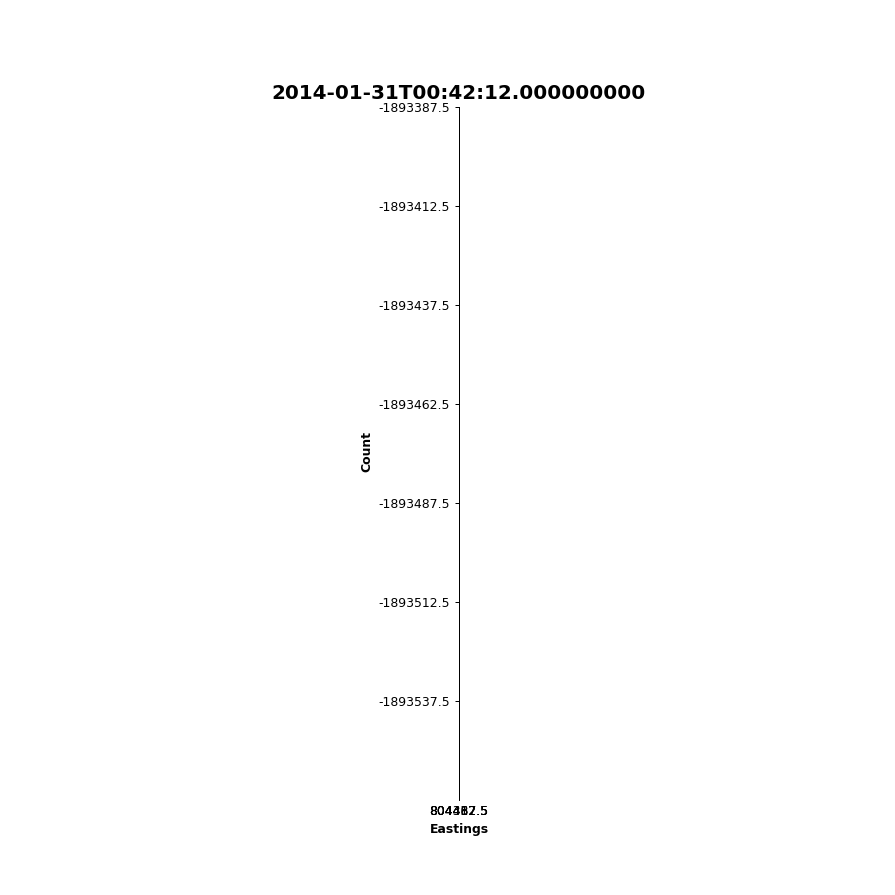

In [35]:
threeBandImage(data_time1, time = 0, bands=['red','green','blue'])

<IPython.core.display.Javascript object>


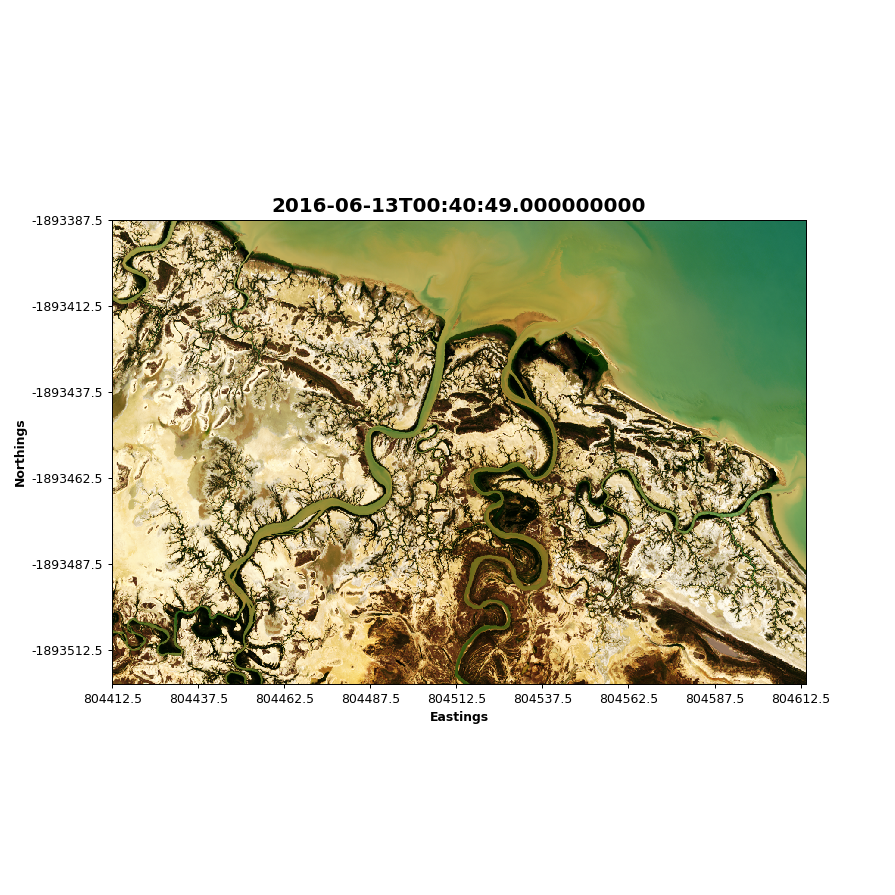

In [20]:
threeBandImage(data_time2, time = 0, bands=['red','green','blue'])

In [48]:
NDVI_one = (data_time1['nir']-data_time1['red'])/(data_time1['nir']+data_time1['red'])
NDVI_two = (data_time2['nir']-data_time2['red'])/(data_time2['nir']+data_time2['red'])
#NDVI_diff = NDVI_two-NDVI_one

In [49]:
NDVI_one = NDVI_one.squeeze()
NDVI_two = NDVI_two.squeeze()
NDVI_one

<xarray.DataArray (y: 1079, x: 1613)>
array([[ 0.208696,  0.198144,  0.170168, ..., -0.647059, -0.623972, -0.630769],
       [ 0.21865 ,  0.144509,  0.13997 , ..., -0.637455, -0.614402, -0.636147],
       [ 0.16864 ,  0.138993,  0.14351 , ..., -0.630332, -0.629977, -0.634638],
       ...,
       [ 0.169494,  0.376871,  0.444207, ...,  0.560963,  0.566573,  0.546855],
       [ 0.187471,  0.386013,  0.449732, ...,  0.586714,  0.611863,  0.570692],
       [ 0.23461 ,  0.395466,  0.449307, ...,  0.586989,  0.598523,  0.580155]])
Coordinates:
    time     datetime64[ns] 2014-01-31T00:42:12
  * y        (y) float64 -1.893e+06 -1.893e+06 -1.893e+06 -1.893e+06 ...
  * x        (x) float64 8.044e+05 8.044e+05 8.044e+05 8.045e+05 8.045e+05 ...

In [50]:
NDVI_diff = NDVI_two-NDVI_one

In [52]:
NDVI_diff.plot()

In [13]:
ndvi_cmap = mpl.colors.ListedColormap(['blue', '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600'])
ndvi_bounds = [-1, 0, 0.1, 0.25, 0.35, 0.5, 0.8, 1]
ndvi_norm = mpl.colors.BoundaryNorm(ndvi_bounds, ndvi_cmap.N)

<IPython.core.display.Javascript object>


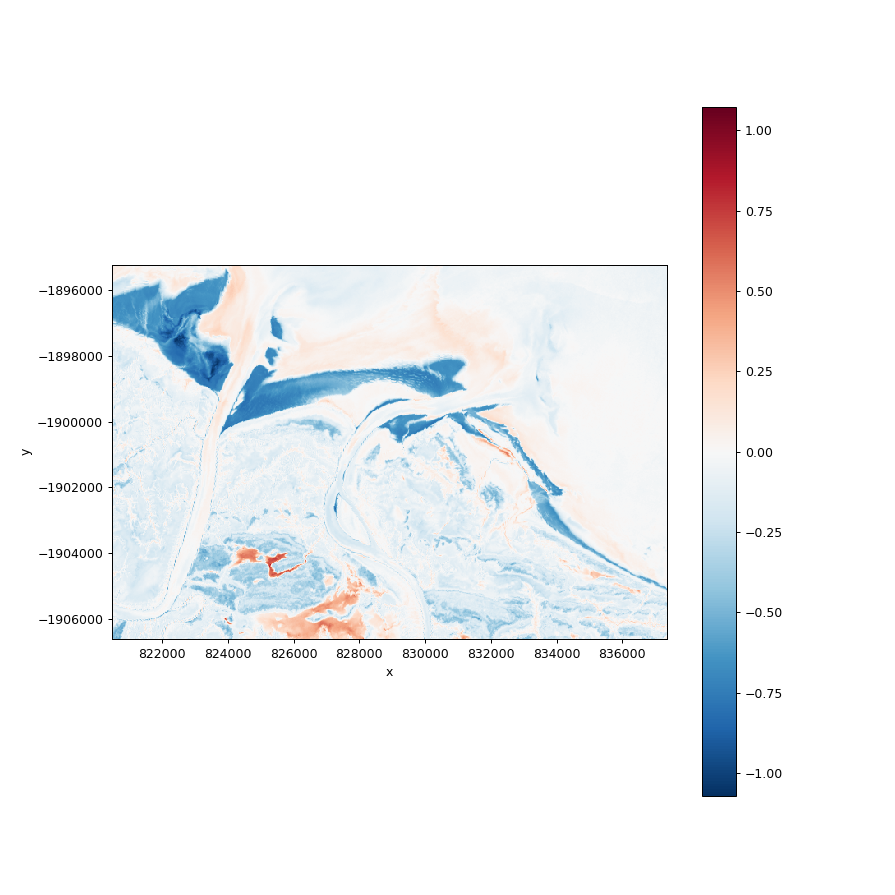

TypeError: Invalid dimensions for image data

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('time one NDVI')
norm = mpl.colors.Normalize(vmin=-0.25, vmax=0.45)
cax = ax.imshow(NDVI_one, cmap = 'Spectral', norm=norm)
cbar = fig.colorbar(cax, fraction=0.038, pad=0.04)
plt.savefig('plots/land/ndvi_time)1.png')
plt.show()


<IPython.core.display.Javascript object>


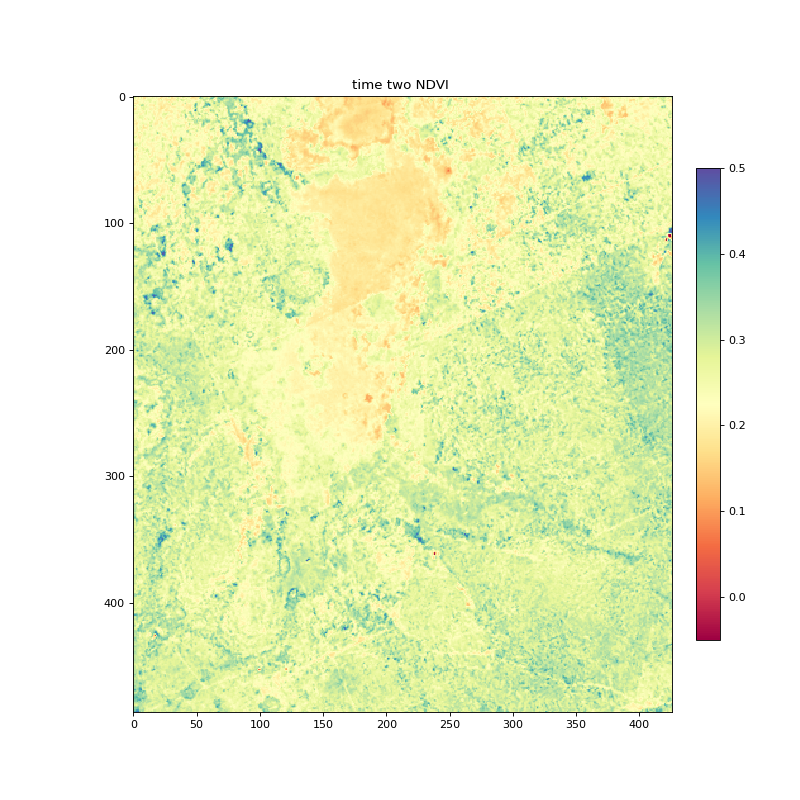

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('time two NDVI ')
norm = mpl.colors.Normalize(vmin=-0.05, vmax=0.5)
cax = ax.imshow(NDVI_two, cmap = 'Spectral', norm=norm )
cbar = fig.colorbar(cax, fraction=0.038, pad=0.04)
plt.savefig('plots/land/ndvi_time_2.png')
plt.show()


fig, ax = plt.subplots(figsize=(10,10))
plt.title('Time Two NDVI')
ax.imshow(NDVI_two, cmap = ndvi_cmap, norm = ndvi_norm)
plt.savefig('plots/land/ndvi_after.png')
plt.show()

<IPython.core.display.Javascript object>


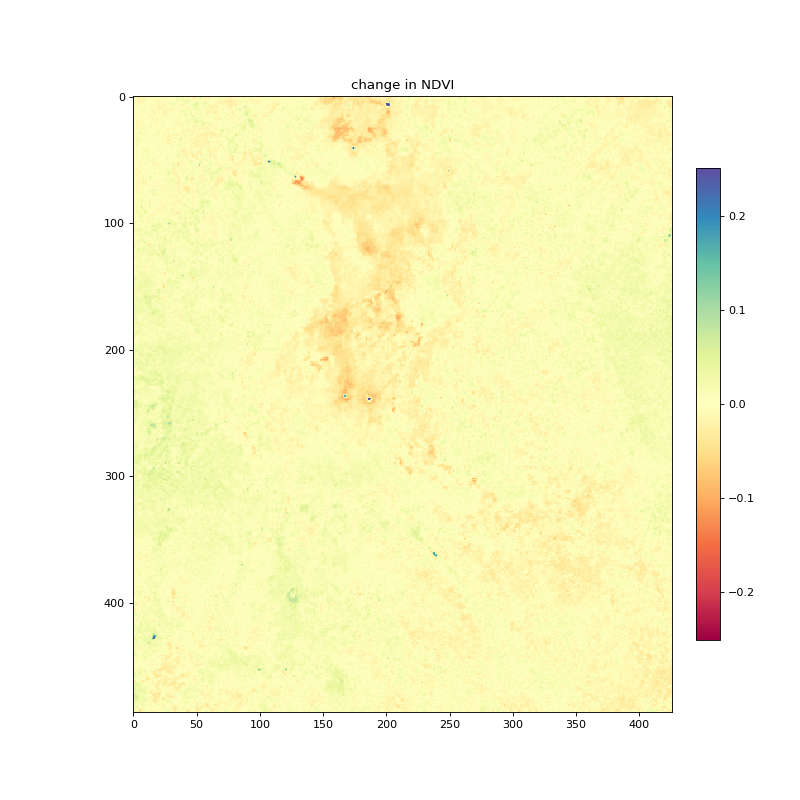

In [16]:

fig, ax = plt.subplots(figsize=(10,10))
plt.title('change in NDVI')
norm = mpl.colors.Normalize(vmin=-0.25, vmax=0.25)
cax = ax.imshow(NDVI_diff, cmap = 'Spectral', norm=norm )
cbar = fig.colorbar(cax, fraction=0.038, pad=0.04)
plt.savefig('plots/land/ndvi_change.png')
plt.show()
